In [2]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import gridspec

%matplotlib inline

# Part 1

In [3]:
data = pd.read_table('AASZ_topo.txt', header=1)                       # load data

In [4]:
data.head()

,Longitude,Latitude,Distance (km),Elevation (m)
0,-159.30000,52.200000,0.000000,-4724.4414
1,-159.30617,52.212320,1.432806,-4720.9270
2,-159.31232,52.224640,2.865611,-4721.0186
3,-159.31850,52.236958,4.298417,-4722.9375
4,-159.32466,52.249280,5.731223,-4727.7090


In [5]:
data.columns = ['longitude','latitude','distance','elevation']         # rename DataFrame columns
data.head()

,longitude,latitude,distance,elevation
0,-159.30000,52.200000,0.000000,-4724.4414
1,-159.30617,52.212320,1.432806,-4720.9270
2,-159.31232,52.224640,2.865611,-4721.0186
3,-159.31850,52.236958,4.298417,-4722.9375
4,-159.32466,52.249280,5.731223,-4727.7090


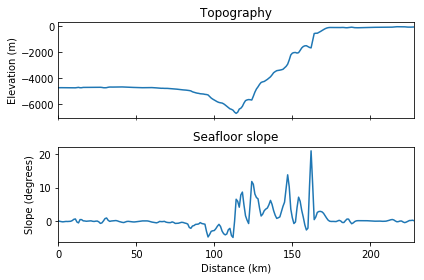

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

data.elevation.plot(ax=axes[0])
axes[0].set_ylabel('Elevation (m)')
axes[0].set_xlabel('Distance (km)')
axes[0].tick_params(direction='in')
axes[0].set_title('Topography')

h = data.distance[1]*1000                                                  # single increment in distance (km)
data['slope'] = pd.Series()
for i in range(len(data)-2):                                          # central difference finite difference approximation
    data.slope[i] = (np.arctan((data.elevation[i+2] - data.elevation[i]) / (2*h)) * 180) / np.pi
for i in range(len(data)-2, len(data)):                               # backwards difference FDA for the last two
    data.slope[i] = (np.arctan((data.elevation[i] - data.elevation[i-1]) / h) * 180) / np.pi     

data.slope.plot(ax=axes[1])
axes[1].set_ylabel('Slope (degrees)')
axes[1].set_xlabel('Distance (km)')
axes[1].set_title('Seafloor slope')
plt.tight_layout()

fig.savefig('AASZ_topo_slope.pdf')

# Part 2

In [342]:
stations = pd.read_table('http://ds.iris.edu/files/earthscope/usarray/_US-TA-StationList.txt', parse_dates=[7])
stations.head()

,VNET,NET,STA,SITE DESCRIPTION,LAT,LON,ELEV,START,END,STATUS,INSTALL,CERT
0,_US-TA,AK,ANM,"Anvil Mountain, AK, USA",64.56,-165.37,338.0,2015-02-19,2599/12/31,Operating,2010/06/21,2015/02/20
1,_US-TA,AK,BGLC,"Bering Glacier BLM Camp, AK, USA",60.12,-143.28,10.0,2015-02-19,2599/12/31,Operating,2013/01/01,2015/02/20
2,_US-TA,AK,BMR,"Bremner River, AK, USA",60.97,-144.61,842.0,2015-02-19,2599/12/31,Operating,2000/08/07,2015/02/20
3,_US-TA,AK,BPAW,"Bear Paw Mountain, AK, USA",64.10,-150.99,619.0,2015-02-19,2599/12/31,Operating,2004/05/13,2015/02/20
4,_US-TA,AK,BRSE,"Bradley Lake South, AK, USA",59.74,-150.74,541.0,2015-02-19,2599/12/31,Operating,2013/07/01,2015/02/20


### GMT script: run assignment_9.sh script on GMT (takes about 15 seconds to run)